In [4]:
import obspy
import glob
from obspy import UTCDateTime as UTC
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import sys
import pandas as pd
from math import sin, cos, sqrt, atan2, radians, isnan, floor, ceil
from scipy import signal
import pickle
import json
import pyrocko
from pyrocko import cake
from pyrocko.plot import cake_plot
import csv
import os
import obspy
import math
import glob
from obspy import UTCDateTime as UTC
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from math import sin, cos, sqrt, atan2, radians
from scipy import signal
from cartopy.io import shapereader
from PIL import Image
from scipy.interpolate import griddata
import cartopy
import cartopy.crs as ccrs
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as tile
import pyproj
from matplotlib.patches import Patch,Circle
geodesic = pyproj.Geod(ellps='WGS84')
from matplotlib.offsetbox import AnchoredText

In [2]:
dframe=pd.read_csv('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/passed_events_newnew.csv')
eindex=dframe['Index']
magnitude=dframe['Magnitude']
latitude=dframe['Latitude']
longitude=dframe['Longitude']
distance=dframe['Epi-distance']
wsss=dframe['WSS']
ssss=dframe['SSS']

In [8]:
lati1=37
lati2=42
long1=139
long2=145
stations = pd.read_csv('/nfs/turbo/lsa-zspica/work/yaolinm/for_jiuxun/Channel_position_LV_v2.csv',header=None,delimiter=',')
lats=stations[1]
lons=stations[2]

daslat=39.2633725374648 
daslon=142.144805409815

lon100=[]
lat100=[]
lon200=[]
lat200=[]

for az in range(0,360):
    newlon,newlat,_ = geodesic.fwd(daslon, daslat, az, 100*1000)
    lon100.append(newlon)
    lat100.append(newlat)
    newlon,newlat,_ = geodesic.fwd(daslon, daslat, az, 200*1000)
    lon200.append(newlon)
    lat200.append(newlat)

In [6]:
long_detected=[]
lati_detected=[]
mag_detected=[]
long_ndetected=[]
lati_ndetected=[]
mag_ndetected=[]
clong_detected=[]
clati_detected=[]
cmag_detected=[]
clong_ndetected=[]
clati_ndetected=[]
cmag_ndetected=[]

for i in range(len(wsss)):
    if distance[i]<=250:
        if wsss[i]==1 or eindex[i]==3856:
            long_detected.append(longitude[i])
            lati_detected.append(latitude[i])
            mag_detected.append(max(magnitude[i]**4/4,0.25))
        else:
            long_ndetected.append(longitude[i])
            lati_ndetected.append(latitude[i])
            mag_ndetected.append(max(magnitude[i]**4/4,0.25))

        if ssss[i]==1:
            clong_detected.append(longitude[i])
            clati_detected.append(latitude[i])
            cmag_detected.append(max(magnitude[i]**4/4,0.25))
        else:
            clong_ndetected.append(longitude[i])
            clati_ndetected.append(latitude[i])
            cmag_ndetected.append(max(magnitude[i]**4/4,0.25))

In [43]:
def cal_dis(lati1,long1,lati2,long2):
    R = 6373.0
    
    lat1 = radians(lati1)
    lon1 = radians(long1)
    lat2 = radians(lati2)
    lon2 = radians(long2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

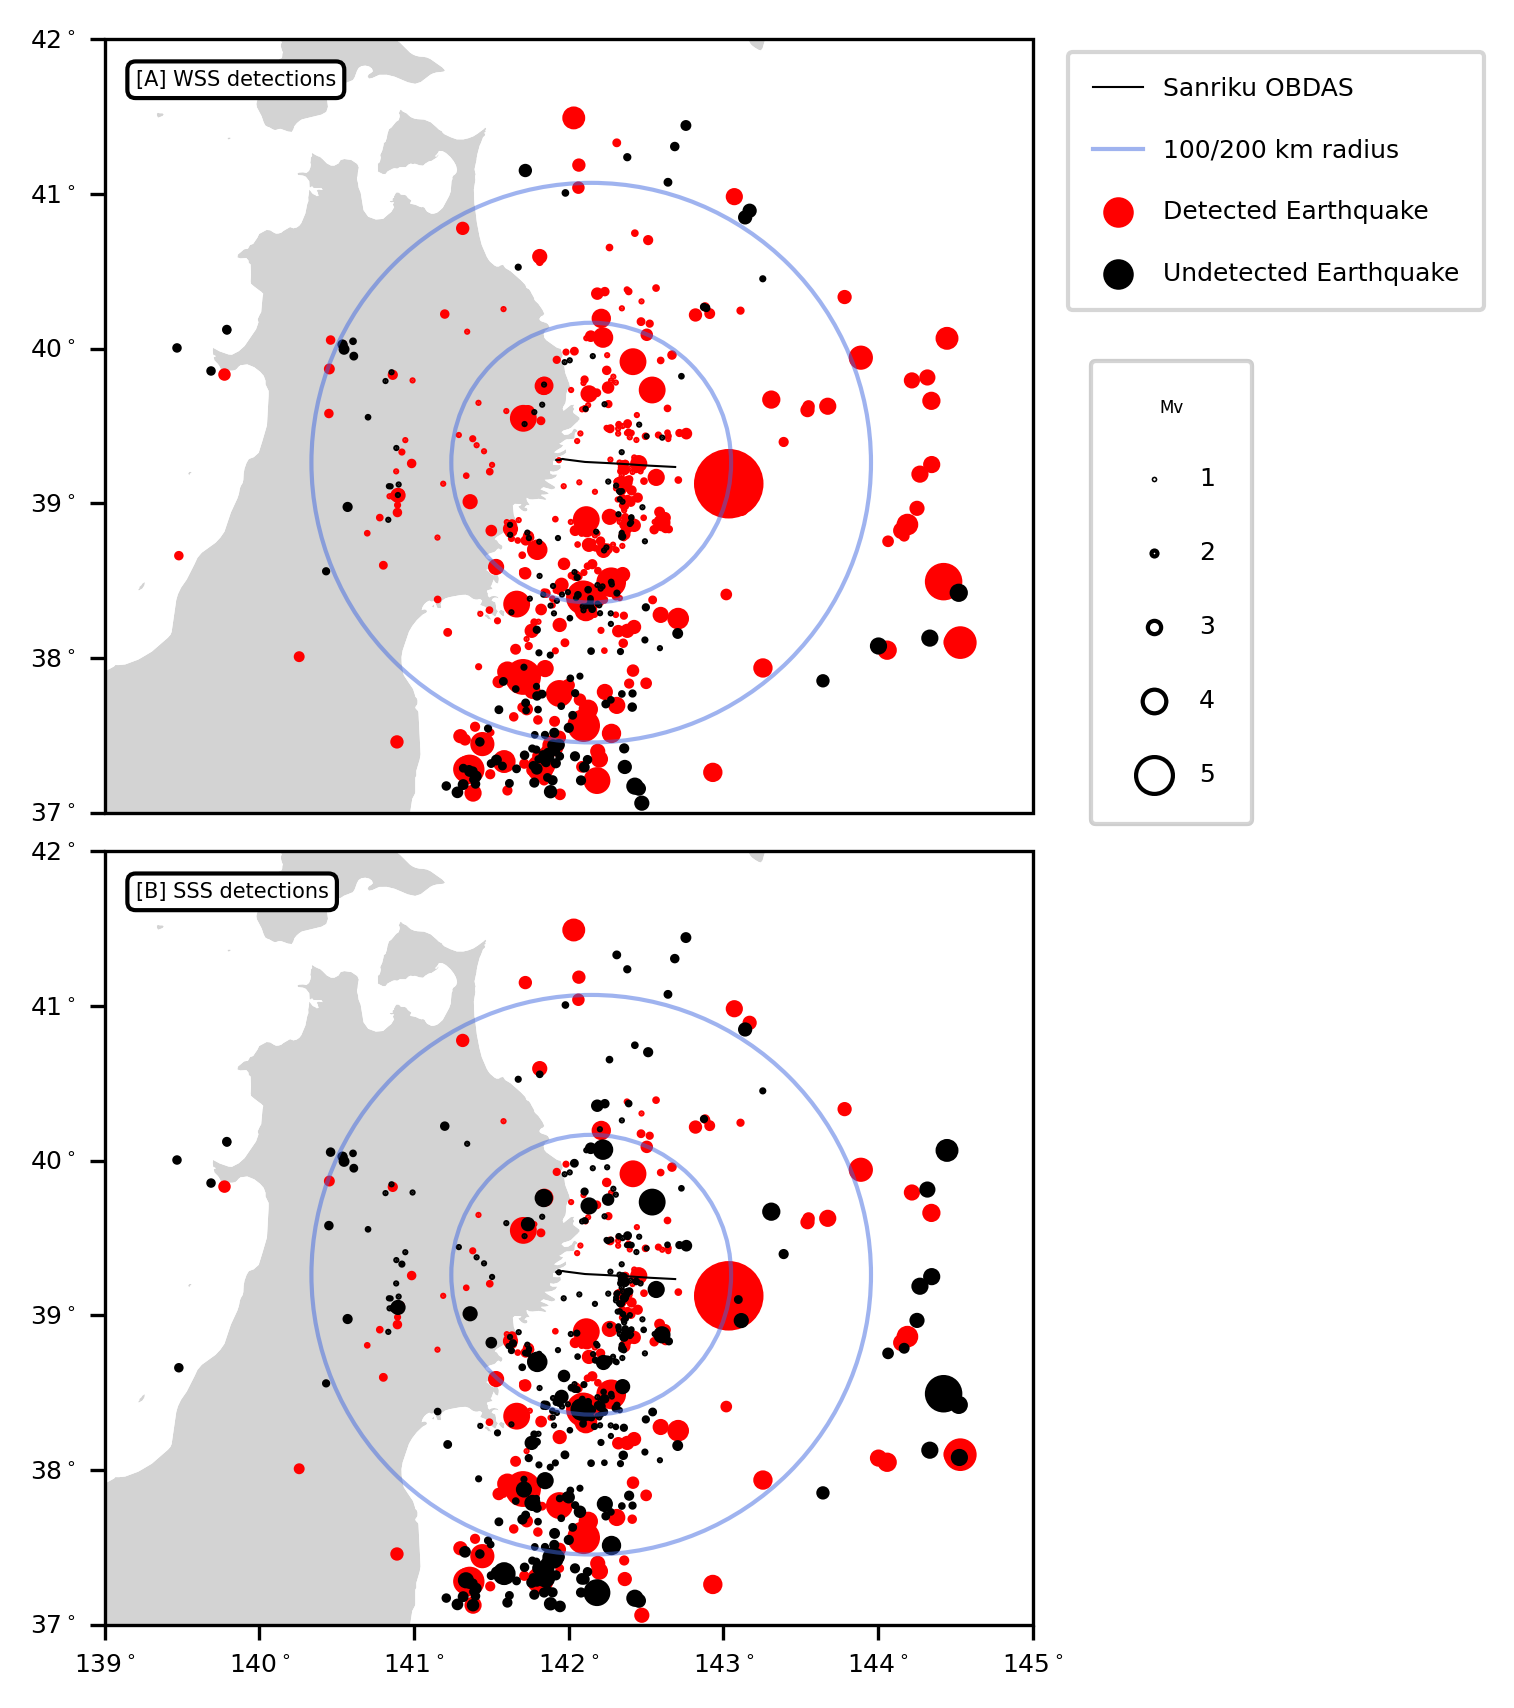

In [9]:
### F8

xlocs=[139,140,141,142,143,144,145]
ylocs=[37,38,39,40,41,42]

fig=plt.figure(figsize=(7,7),dpi=300)
fig.subplots_adjust(hspace=0.05,wspace=0)
proj = cartopy.crs.PlateCarree()

ax1 = fig.add_subplot(211, projection=proj)
ax1.set_xlim((long1, long2))
ax1.set_ylim((lati1, lati2))
ax1.text(139.2,41.7,'[A] WSS detections',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),c='k',fontsize=5)

ax1.add_feature(cfeature.LAND,facecolor='lightgrey')
ax1.add_feature(cfeature.OCEAN,facecolor='white')

ax1.plot(lons[:13722],lats[:13722], c='k',zorder=6,linewidth=0.5,label='Sanriku OBDAS')
ax1.add_patch(Circle(xy=[daslon,daslat], radius =100/110.574,fill=False, zorder=30,ec='royalblue',
                     alpha=0.5,transform=cartopy.crs.PlateCarree()))
ax1.add_patch(Circle(xy=[daslon,daslat], radius =200/110.574,fill=False, zorder=30,ec='royalblue',
                     alpha=0.5,transform=cartopy.crs.PlateCarree()))
ax1.plot(10,10,c='royalblue',alpha=0.5,zorder=1,lw=1,label='100/200 km radius')

ax1.scatter(long_detected,lati_detected,marker='o',c='red',edgecolor='red',s=mag_detected,transform=cartopy.crs.PlateCarree(),zorder=5)
ax1.scatter(long_ndetected,lati_ndetected,marker='o',c='k',edgecolor='k',s=mag_ndetected,transform=cartopy.crs.PlateCarree(),zorder=5)

ax1.scatter(0,0,marker='o',color='red',s=40,transform=ccrs.PlateCarree(),label='Detected Earthquake')
ax1.scatter(0,0,marker='o',color='black',s=40,transform=ccrs.PlateCarree(),label='Undetected Earthquake')
ax1.legend(borderpad=1,labelspacing=1.5,fontsize=6,loc='upper right',bbox_to_anchor=(1.5,1))

# ax1.set_xticks([139,140,141,142,143,144,145])
# ax1.set_xticklabels(['','','','','','',''])
# ax1.set_yticks([37,38,39,40,41,42])
# ax1.set_yticklabels([37,38,39,40,41,42], fontsize=6)
# ax1.set_ylabel("Laitude ($^{\circ}$)", fontsize=9)
ax1.set_yticks(ylocs)
ax1.set_yticklabels(labels=['$%.0f ^\circ$' % y for y in ylocs], fontsize=6)


###second

ax2 = fig.add_subplot(212, projection=proj)
ax2.set_xlim((long1, long2))
ax2.set_ylim((lati1, lati2))
ax2.text(139.2,41.7,'[B] SSS detections',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),c='k',fontsize=5)

ax2.add_feature(cfeature.LAND,facecolor='lightgrey')
ax2.add_feature(cfeature.OCEAN,facecolor='white')

ax2.plot(lons[:13722],lats[:13722], c='k',zorder=6,linewidth=0.5)
ax2.add_patch(Circle(xy=[daslon,daslat], radius =100/110.574,fill=False, zorder=30,ec='royalblue',
                     alpha=0.5,transform=cartopy.crs.PlateCarree()))
ax2.add_patch(Circle(xy=[daslon,daslat], radius =200/110.574,fill=False, zorder=30,ec='royalblue',
                     alpha=0.5,transform=cartopy.crs.PlateCarree()))


ax2.scatter(clong_detected,clati_detected,marker='o',c='red',edgecolor='red',s=cmag_detected,transform=cartopy.crs.PlateCarree(),zorder=5)
ax2.scatter(clong_ndetected,clati_ndetected,marker='o',c='k',edgecolor='k',s=cmag_ndetected,transform=cartopy.crs.PlateCarree(),zorder=5)

# ax2.set_xticks([139,140,141,142,143,144,145])
# ax2.set_xticklabels([139,140,141,142,143,144,145], fontsize=6)

ax2.set_xticks(xlocs)
ax2.set_yticks(ylocs)
ax2.set_xticklabels(labels=['$ %.0f ^\circ$' % x for x in xlocs], fontsize=6)
ax2.set_yticklabels(labels=['$%.0f ^\circ$' % y for y in ylocs], fontsize=6)
# ax2.set_xlabel("Longitude ($^{\circ}$)", fontsize=9)
# ax2.set_yticks([37,38,39,40,41,42])
# ax2.set_yticklabels([37,38,39,40,41,42], fontsize=6)
# ax2.set_ylabel("Laitude ($^{\circ}$)", fontsize=9)

scatter2=plt.scatter(80,180,marker='o',c='white',edgecolor='black',s=1**4/8,transform=ccrs.PlateCarree())
scatter3=plt.scatter(80,180,marker='o',c='white',edgecolor='black',s=2**4/8,transform=ccrs.PlateCarree())
scatter4=plt.scatter(80,180,marker='o',c='white',edgecolor='black',s=3**4/8,transform=ccrs.PlateCarree())
scatter5=plt.scatter(80,180,marker='o',c='white',edgecolor='black',s=4**4/8,transform=ccrs.PlateCarree())
scatter6=plt.scatter(80,180,marker='o',c='white',edgecolor='black',s=5**4/8,transform=ccrs.PlateCarree())
legend2=plt.legend([scatter2,scatter3,scatter4,scatter5,scatter6],['1','2','3','4','5'],
                   borderpad=1.5,labelspacing=2,fontsize=6,loc='upper right',bbox_to_anchor=(1.25,1.65))
legend2.set_title('Mv')
legend2.get_title().set_fontsize('4')
plt.gca().add_artist(legend2)

# plt.savefig('event_map_large.png',dpi=300, bbox_inches = 'tight')

In [75]:
cataloged_wss=np.zeros(9600)
cataloged_sss=np.zeros(9600)
all_wss=np.zeros(9600)
all_sss=np.zeros(9600)

cataloged_combined=np.zeros(9600)
done=[]

infos1=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/WSS/cataloged_info/within1000/*.pkl')
infos2=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/WSS/cataloged_info/out1000/*.pkl')
infos=np.sort(infos1+infos2)
for info in infos:
    
    with open(info,'rb') as f:
        infodic=pickle.load(f)
    cataloged_wss[np.array(infodic['Matched_channels'])]+=1
    all_wss[np.array(infodic['Matched_channels'])]+=1
    cataloged_combined[np.array(infodic['Matched_channels'])]+=1
    
    done.append(os.path.basename(info)[:10])
        
# infos=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/WSS/uncataloged_info/*.pkl')
# for info in infos:
#     with open(info,'rb') as f:
#         infodic=pickle.load(f)
#     all_wss[np.array(infodic['Matched_channels'])]+=1
        
infos1=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/SSS/cataloged_info/within1000/*.pkl')
infos2=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/SSS/cataloged_info/out1000/*.pkl')
infos=np.sort(infos1+infos2)
for info in infos:
    
    
    with open(info,'rb') as f:
        infodic=pickle.load(f)
    cataloged_sss[np.array(infodic['Matched_channels'])]+=1
    all_sss[np.array(infodic['Matched_channels'])]+=1
    
    if os.path.basename(info)[:10] not in done:
        done.append(os.path.basename(info)[:10])
        cataloged_combined[np.array(infodic['Matched_channels'])]+=1
    
# infos=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/SSS/uncataloged_info/*.pkl')
# for info in infos:
#     with open(info,'rb') as f:
#         infodic=pickle.load(f)
#     all_sss[np.array(infodic['Matched_channels'])]+=1

In [44]:
sec1_mag=[]
sec1_dist=[]
sec1_dep=[]
sec2_mag=[]
sec2_dist=[]
sec2_dep=[]
sec3_mag=[]
sec3_dist=[]
sec3_dep=[]

infos1=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/WSS/cataloged_info/within1000/*.pkl')
infos2=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s//WSS/cataloged_info/out1000/*.pkl')
infos=np.sort(infos1+infos2)

for info in infos:
    with open(info,'rb') as f:
        infodic=pickle.load(f)
        
        if infodic['Distance'] <=1000 and infodic['Depth'] <=200:
            chs=infodic['Matched_channels']
            
            for k in range(400,600):
                if k in chs:
                    sec1_mag.append(infodic['Magnitude'])
                    sec1_dist.append(infodic['Distance'])
                    sec1_dep.append(infodic['Depth'])
                    break

            for k in range(1400,1600):
                if k in chs:
                    sec2_mag.append(infodic['Magnitude'])
                    sec2_dist.append(infodic['Distance'])
                    sec2_dep.append(infodic['Depth'])
                    break
                    
            for k in range(9000,9200):
                if k in chs:
                    sec3_mag.append(infodic['Magnitude'])
                    sec3_dist.append(infodic['Distance'])
                    sec3_dep.append(infodic['Depth'])
                    break
                    
infos1=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/SSS/cataloged_info/within1000/*.pkl')
infos2=glob.glob('/nfs/turbo/lsa-zspica/work/yaolinm/Japan_detection/final_catalog_14s/SSS/cataloged_info/out1000/*.pkl')
infos=np.sort(infos1+infos2)

for info in infos:
    with open(info,'rb') as f:
        infodic=pickle.load(f)
        
        if infodic['Distance'] <=1000 and infodic['Depth'] <=200:
            chs=infodic['Matched_channels']
            
            for k in range(400,600):
                if k in chs:
                    sec1_mag.append(infodic['Magnitude'])
                    sec1_dist.append(cal_dis(lats[k],lons[k],infodic['Latitude'],infodic['Longitude']))
                    sec1_dep.append(infodic['Depth'])
                    break

            for k in range(1400,1600):
                if k in chs:
                    sec2_mag.append(infodic['Magnitude'])
                    sec2_dist.append(cal_dis(lats[k],lons[k],infodic['Latitude'],infodic['Longitude']))
                    sec2_dep.append(infodic['Depth'])
                    break
                    
            for k in range(9000,9200):
                if k in chs:
                    sec3_mag.append(infodic['Magnitude'])
                    sec3_dist.append(cal_dis(lats[k],lons[k],infodic['Latitude'],infodic['Longitude']))
                    sec3_dep.append(infodic['Depth'])
                    break

Text(9250, 140, '[F]')

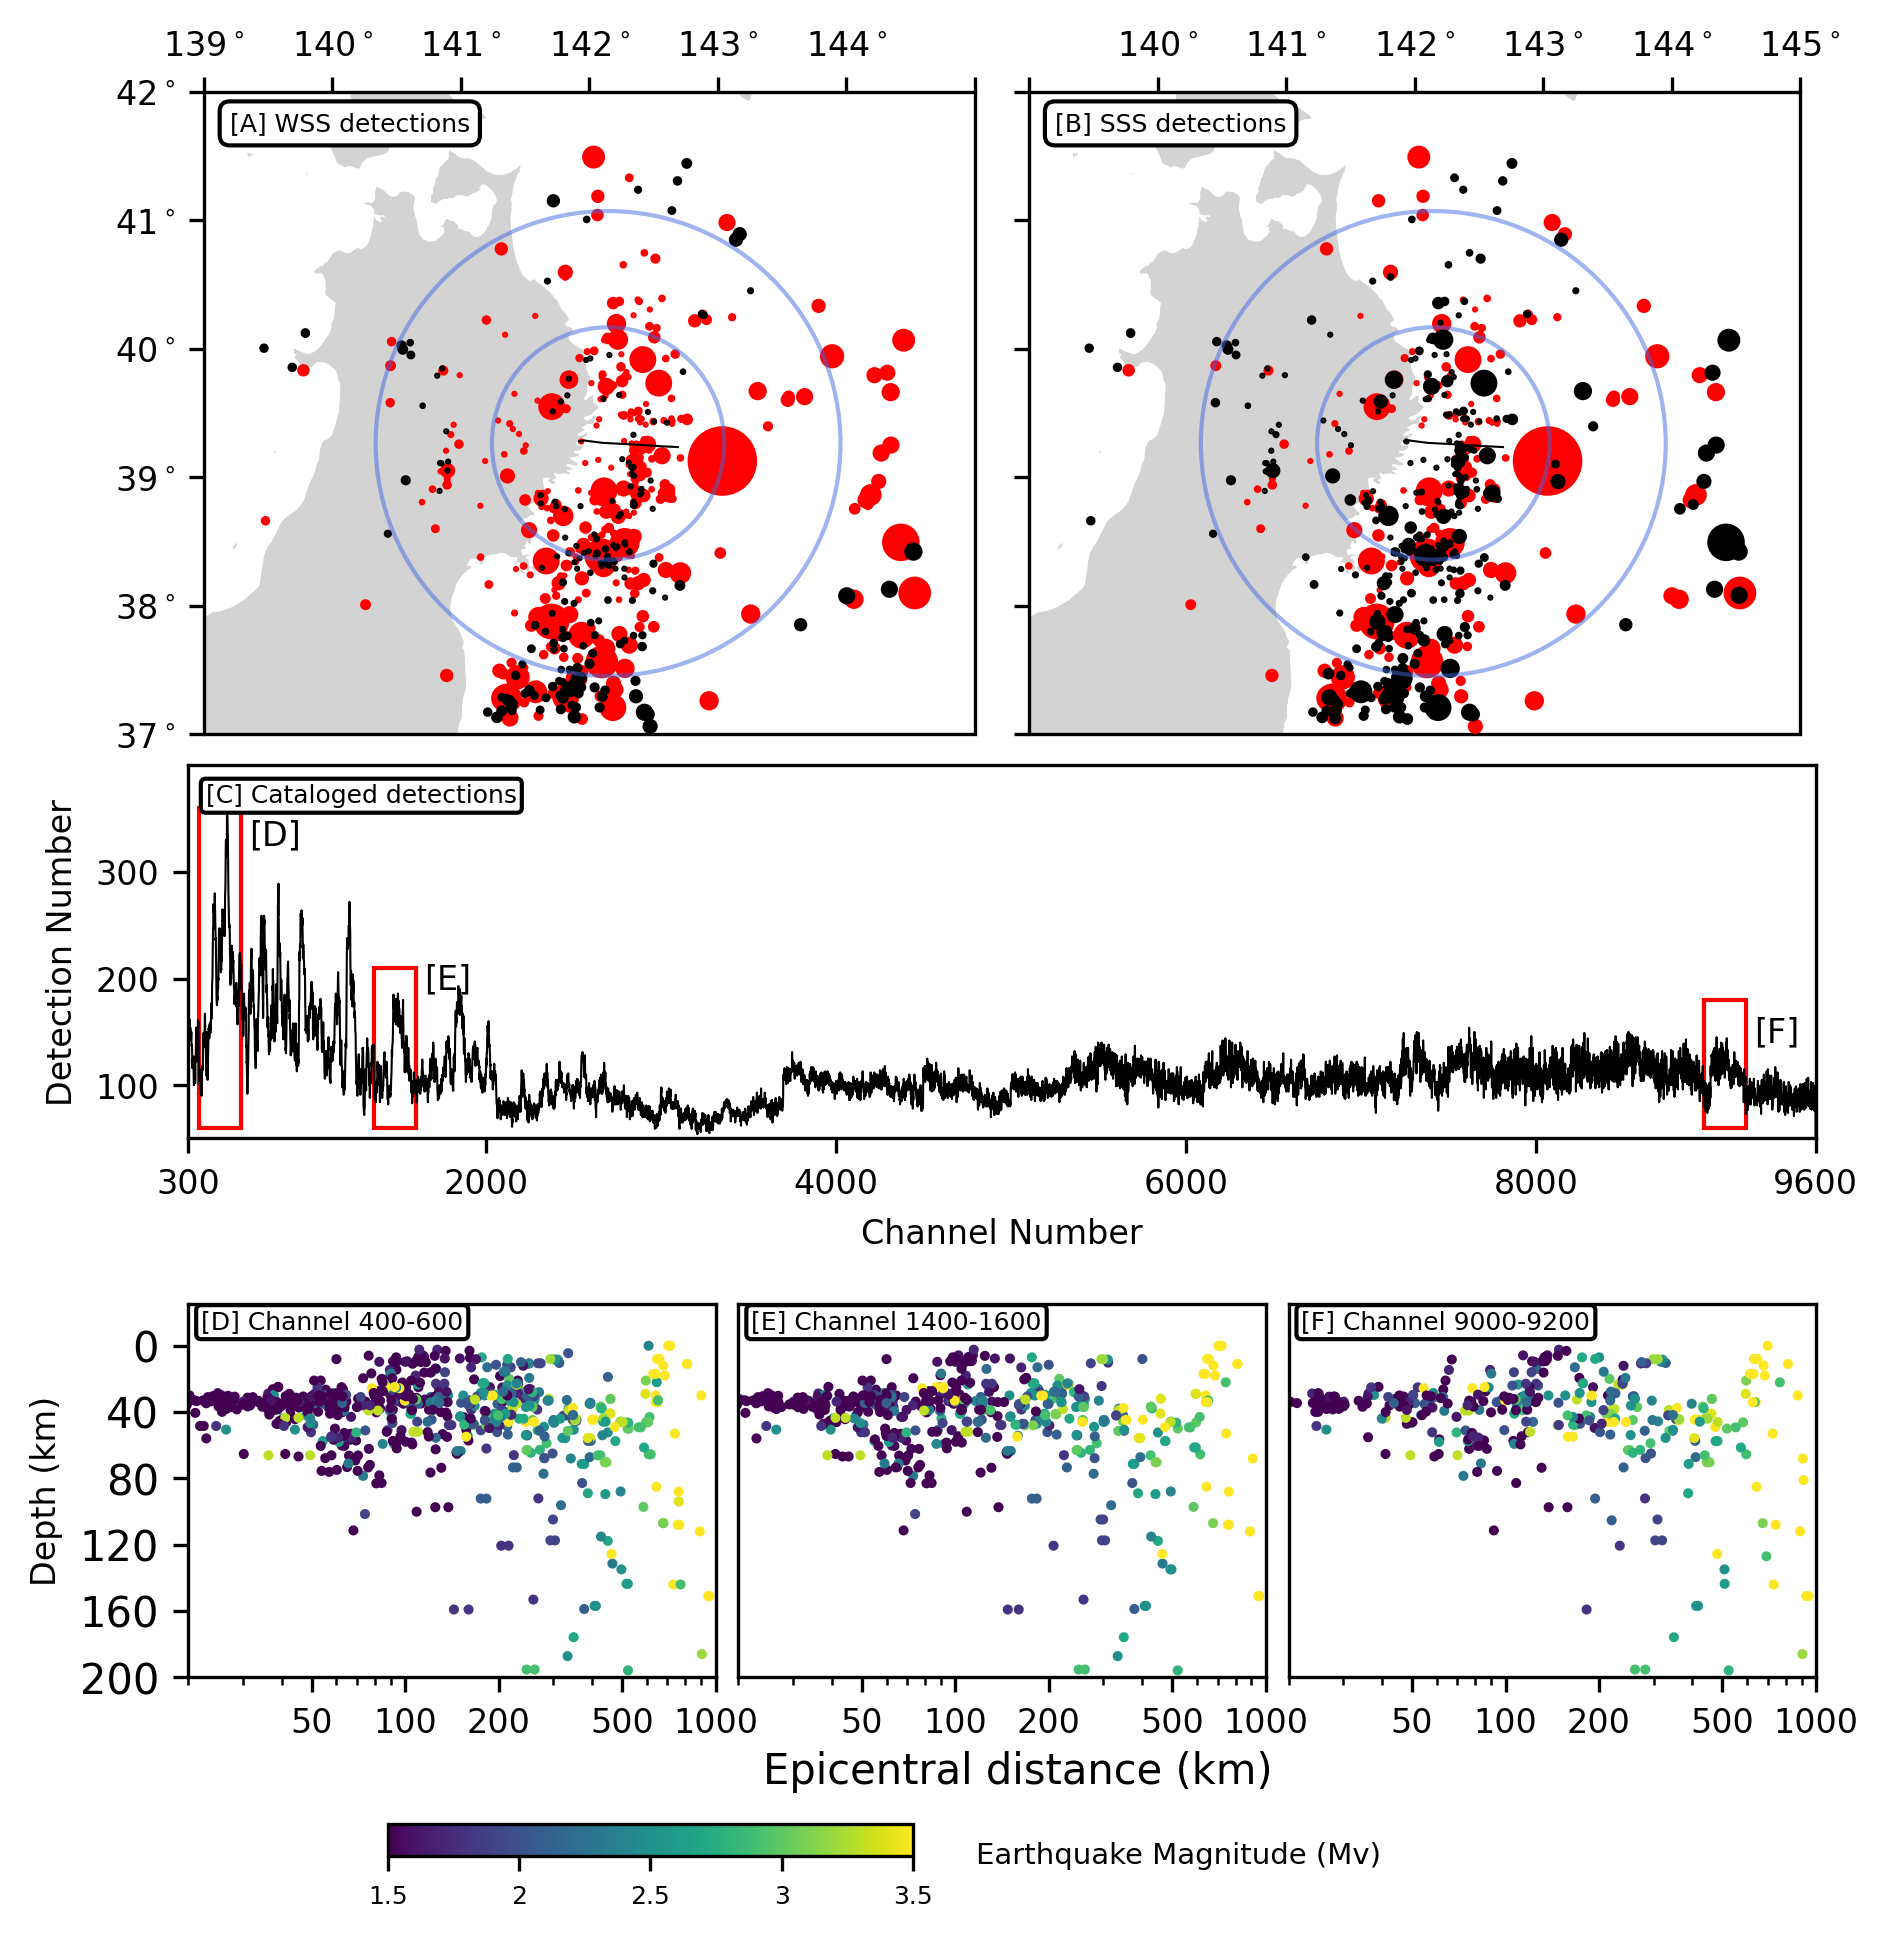

In [85]:
fig=plt.figure(figsize=(7,7),dpi=300)
fig.subplots_adjust(hspace=0.3,wspace=0.2)
proj = cartopy.crs.PlateCarree()

# ax1 = fig.add_subplot(211, projection=proj)

ax1 = plt.subplot2grid(shape=(12,12), loc=(0,0), colspan=6,rowspan=5, projection=proj)
ax2 = plt.subplot2grid(shape=(12,12), loc=(0,6), colspan=6,rowspan=5, projection=proj)
ax3 = plt.subplot2grid(shape=(12,12), loc=(5,0), colspan=12,rowspan=3)
ax4 = plt.subplot2grid(shape=(12,12), loc=(9,0), colspan=4,rowspan=3)
ax5 = plt.subplot2grid(shape=(12,12), loc=(9,4), colspan=4,rowspan=3)
ax6 = plt.subplot2grid(shape=(12,12), loc=(9,8), colspan=4,rowspan=3)

ax1.set_xlim((long1, long2))
ax1.set_ylim((lati1, lati2))
ax1.text(139.2,41.7,'[A] WSS detections',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),c='k',fontsize=6)

ax1.add_feature(cfeature.LAND,facecolor='lightgrey')
ax1.add_feature(cfeature.OCEAN,facecolor='white')

ax1.plot(lons[:13722],lats[:13722], c='k',zorder=6,linewidth=0.5,label='Sanriku OBDAS')
ax1.add_patch(Circle(xy=[daslon,daslat], radius =100/110.574,fill=False, zorder=30,ec='royalblue',
                     alpha=0.5,transform=cartopy.crs.PlateCarree()))
ax1.add_patch(Circle(xy=[daslon,daslat], radius =200/110.574,fill=False, zorder=30,ec='royalblue',
                     alpha=0.5,transform=cartopy.crs.PlateCarree()))
ax1.plot(10,10,c='royalblue',alpha=0.5,zorder=1,lw=1,label='100/200 km radius')

ax1.scatter(long_detected,lati_detected,marker='o',c='red',edgecolor='red',s=mag_detected,transform=cartopy.crs.PlateCarree(),zorder=5)
ax1.scatter(long_ndetected,lati_ndetected,marker='o',c='k',edgecolor='k',s=mag_ndetected,transform=cartopy.crs.PlateCarree(),zorder=5)

ax1.set_yticks(ylocs)
ax1.set_yticklabels(labels=['$%.0f ^\circ$' % y for y in ylocs], fontsize=8)
ax1.set_xticks(xlocs)
ax1.set_xticklabels(labels=['$ %.0f ^\circ$' % x for x in xlocs[:-1]]+[''], fontsize=8)
ax1.xaxis.tick_top()

###second

ax2.set_xlim((long1, long2))
ax2.set_ylim((lati1, lati2))
ax2.text(139.2,41.7,'[B] SSS detections',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),c='k',fontsize=6)

ax2.add_feature(cfeature.LAND,facecolor='lightgrey')
ax2.add_feature(cfeature.OCEAN,facecolor='white')

ax2.plot(lons[:13722],lats[:13722], c='k',zorder=6,linewidth=0.5)
ax2.add_patch(Circle(xy=[daslon,daslat], radius =100/110.574,fill=False, zorder=30,ec='royalblue',
                     alpha=0.5,transform=cartopy.crs.PlateCarree()))
ax2.add_patch(Circle(xy=[daslon,daslat], radius =200/110.574,fill=False, zorder=30,ec='royalblue',
                     alpha=0.5,transform=cartopy.crs.PlateCarree()))


ax2.scatter(clong_detected,clati_detected,marker='o',c='red',edgecolor='red',s=cmag_detected,transform=cartopy.crs.PlateCarree(),zorder=5)
ax2.scatter(clong_ndetected,clati_ndetected,marker='o',c='k',edgecolor='k',s=cmag_ndetected,transform=cartopy.crs.PlateCarree(),zorder=5)

ax2.set_xticks(xlocs)
ax2.set_yticks(ylocs)
ax2.set_xticklabels(labels=['']+['$ %.0f ^\circ$' % x for x in xlocs[1:]], fontsize=8)
ax2.set_yticklabels(labels=['','','','','',''], fontsize=8)
ax2.xaxis.tick_top()


# ax3.plot(np.arange(300,9600),cataloged_wss[300:9600]+cataloged_sss[300:9600],linewidth=0.5,c='r',alpha=1,label='Cataloged WSS detections')
ax3.plot(np.arange(300,9600),cataloged_combined[300:9600],linewidth=0.5,c='k',alpha=1)
# ax3.plot(np.arange(200),cataloged_sss[:200],linewidth=0.5,c='b')
# ax3.plot(np.arange(300,9599),cataloged_sss[300:9599],linewidth=0.5,c='b',label='Cataloged SSS detections')
# ax3.legend(fontsize=7,loc='upper right')
ax3.set_ylabel('Detection Number',fontsize=8)
ax3.set_xlim(300,9600)
ax3.set_xticks([300,2000,4000,6000,8000,9599])
ax3.set_xticklabels([300,2000,4000,6000,8000,9600],fontsize=8)
ax3.set_yticks([100,200,300])
ax3.set_yticklabels([100,200,300],fontsize=8)
ax3.set_xlabel('Channel Number',fontsize=8)
ax3.set_ylim(50,400)
ax3.text(400,365,'[C] Cataloged detections',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'),c='k',fontsize=6)

sc=ax4.scatter(sec1_dist,sec1_dep,c=sec1_mag, s=2,vmin=1.5,vmax=3.5)
ax4.set_xscale('log')
ax4.set_xlim(20,10**3)
ax4.set_ylim(200,-25)
ax4.text(22,-10,'[D] Channel 400-600',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'),c='k',fontsize=6)

ax5.scatter(sec2_dist,sec2_dep,c=sec2_mag, s=2,vmin=1.5,vmax=3.5)
ax5.set_xscale('log')
ax5.set_xlim(20,10**3)
ax5.set_ylim(200,-25)
ax5.text(22,-10,'[E] Channel 1400-1600',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'),c='k',fontsize=6)


ax6.scatter(sec3_dist,sec3_dep,c=sec3_mag, s=2,vmin=1.5,vmax=3.5)
ax6.set_xscale('log')
ax6.set_xlim(20,10**3)
ax6.set_ylim(200,-25)
ax6.text(22,-10,'[F] Channel 9000-9200',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'),c='k',fontsize=6)

for ax in [ax4,ax5,ax6]:
    ax.set_xticks([50,100,200,500,1000])
    ax.set_xticklabels([50,100,200,500,1000],fontsize=8)
    ax.set_yticks([])
ax4.set_yticks([0,40,80,120,160,200])
ax4.set_yticklabels([0,40,80,120,160,200])
ax4.set_ylabel('Depth (km)',fontsize=8)
fig.text(0.52, 0.08, 'Epicentral distance (km)', ha='center', va='center')

cax=fig.add_axes([0.22,0.04,0.25,0.015])
cbar=fig.colorbar(sc, cax=cax,orientation='horizontal')
fig.text(0.5,0.04,'Earthquake Magnitude (Mv)',va='center',fontsize=7)
cbar.set_ticks([1.5,2,2.5,3,3.5])
cbar.set_ticklabels([1.5,2,2.5,3,3.5])
sc.set_clim(1.5,3.5)
cbar.ax.tick_params(labelsize=6)

rect = patches.Rectangle((360,60), 240, 300, linewidth=1, edgecolor='r', facecolor='none',clip_on=False,zorder=0)
ax3.add_patch(rect)
ax3.text(650,325,'[D]',fontsize=8,c='k')
rect = patches.Rectangle((1360,60), 240, 150, linewidth=1, edgecolor='r', facecolor='none',clip_on=False)
ax3.add_patch(rect)
ax3.text(1650,190,'[E]',fontsize=8,c='k')
rect = patches.Rectangle((8960,60), 240, 120, linewidth=1, edgecolor='r', facecolor='none',clip_on=False)
ax3.add_patch(rect)
ax3.text(9250,140,'[F]',fontsize=8,c='k') 